# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to GMM and SVD.

## Exercise 1 (25 points)

In this exercise we will implement 1-dimensional GMM clustering algorithm from scratch. A GMM distribution is composed of `k` components, each characterized by:

1. A mixture proportion
2. A mean for its Normal Distribution
3. A variance for its Normal Distribution

So, to generate a dataset that follows a GMM dsitrbution we need a list of those parameters. In this exercise we will use a class called `Component` to capture the parameters for a given component. And a GMM will be a list of `Component`s.

In [423]:
class Component:
    def __init__(self, mixture_prop, mean, variance):
        self.mixture_prop = mixture_prop
        self.mean = mean
        self.variance = variance

example_gmm = [Component(.5, 5, 1), Component(.5, 8, 1)]


a) Complete the function below to validate and generate a dataset following a GMM distribution, given a specified set of GMM parameters as above and a size. You may only use the methods already imported in the cell. (10pts)

In [561]:
from numpy.random import normal, uniform

def generate_gmm_dataset(gmm_params, size):
    if not is_valid_gmm(gmm_params):
        raise ValueError("GMM parameters are invalid")
    
    dataset = []
    for _ in range(size):
        comp = get_random_component(gmm_params)
        dataset += [comp]
    return dataset

def is_valid_gmm(gmm_params):
    '''
        Checks that the sum of the mixture
        proportions is 1
    '''
    sum = 0
    for item in gmm_params:
        sum += item.mixture_prop 
    if sum == 1:
        return True
    else:
        return False

def get_random_component(gmm_params):
    '''
        returns component with prob
        proportional to mixture_prop
    '''
    r = uniform(0, 1)
    if r < gmm_params[0].mixture_prop:
        return normal(gmm_params[0].mean, gmm_params[0].variance)
    else:
        return normal(gmm_params[1].mean, gmm_params[1].variance)


# test your code: this should return a list of 10 numbers similar to worksheet 8
data = generate_gmm_dataset(example_gmm, 10)
print(data)

[4.8818762308680315, 7.762003988463754, 2.841933394315927, 7.3783770744963615, 7.675325077532896, 8.59787582449845, 3.843878425311086, 8.485611733313544, 9.361908177365958, 4.556115548735999]


In [425]:
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataset = data
kmeans = KMeans(k, init='k-means++').fit(X=array(dataset).reshape(-1, 1))
gmm_params = []
cluster = []
prob_c = []
mean = []
var = []

# generate k clusters
for i in range(k):
    cluster.append([x[0] for x in filter(lambda x: x[1] == i, zip(data, kmeans.labels_))])
    prob_c.append(len(cluster[i]) / len(data))
    mean.append(sum(cluster[i])/len(cluster[i]))
    var.append(sum(map(lambda x : (x - mean[i]) ** 2, cluster[i])) / len(cluster[i]))
    gmm_params.append(Component(prob_c[i], mean[i], var[i]))
    

prob_c_x = [[] for i in range(k)] # P(C_k | X_i)
prob_x = [] # P(X_i)
# prob_c0_x = []
# prob_c1_x = []
 
for p in range(len(dataset)):
    pdf_i = []
    prob_x_i = 0
    
    for j in range(k):
        # P(X_i | C_j)
        pdf_i.append(norm.pdf(dataset[p], mean[j], var[j]))
        # P(C_j) already computed
        # gmm_params[j].mixture_prop
        # P(X_i) = P(C_0)P(X_i | C_0) + P(C_1)P(X_i | C_1)
        prob_x_i += np.float64(gmm_params[j].mixture_prop) * pdf_i[j]
    prob_x.append(prob_x_i)

    # P(C_j | X_i) = P(X_i | C_j)P(C_j) / P(X_i)
    for j in range(k):
        # prob_c0_x.append(gmm_params[0].mixture_prop * pdf_i[0] / prob_x[p])
        # prob_c1_x.append(gmm_params[1].mixture_prop * pdf_i[1] / prob_x[p])
        prob_c_x[j].append(gmm_params[j].mixture_prop * pdf_i[j] / prob_x[p])
        
for g in gmm_params:
    print(g.mixture_prop)

print("cluster0: ", cluster[0])
print("cluster1: ", cluster[1])
print("\n")
print("prob_c_x:", prob_c_x)

0.5
0.5
cluster0:  [9.13680817842149, 7.260801253235702, 8.395330547721139, 10.143870585003423, 7.047884713197794]
cluster1:  [3.9019415940452404, 4.846005338670189, 4.2194016250224395, 6.336903508659167, 4.994703903859054]


prob_c_x: [[0.00481581397916487, 0.9999999767741876, 0.9917461265662372, 0.9999932893360595, 0.01562022611436697, 0.9999999999970626, 0.006204598670295617, 0.5915282983430027, 0.021076363244831094, 0.974925449329782], [0.9951841860208351, 2.3225812261052476e-08, 0.008253873433762764, 6.710663940629959e-06, 0.9843797738856331, 2.9375638468051902e-12, 0.9937954013297043, 0.40847170165699737, 0.978923636755169, 0.025074550670218004]]


In [601]:
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataset = data
k = 2
kmeans = KMeans(k, init='k-means++').fit(X=array(dataset).reshape(-1, 1))
gmm_params = []
cluster = []
prob_c = []
mean = []
var = []

# generate k clusters
for i in range(k):
    cluster.append([x[0] for x in filter(lambda x: x[1] == i, zip(data, kmeans.labels_))])
    prob_c.append(len(cluster[i]) / len(data))
    mean.append(sum(cluster[i])/len(cluster[i]))
    var.append(sum(map(lambda x : (x - mean[i]) ** 2, cluster[i])) / len(cluster[i]))
    gmm_params.append(Component(prob_c[i], mean[i], var[i]))
    

probs = [] 
prob_x = [] # P(X_i)
# prob_c0_x = []
# prob_c1_x = []
 
for p in range(len(dataset)):
    pdf_i = []
    prob_x_i = 0
    prob_c = [] # P(C_k | X_i)
    
    for j in range(k):
        # P(X_i | C_j)
        pdf_i.append(norm.pdf(dataset[p], gmm_params[j].mean, gmm_params[j].variance))
        # P(C_j) already computed
        gmm_params[j].mixture_prop
        # P(X_i) = P(C_0)P(X_i | C_0) + P(C_1)P(X_i | C_1)
        prob_x_i += np.float64(gmm_params[j].mixture_prop) * pdf_i[j]
        # print(prob_x_i)
    prob_x.append(prob_x_i)

# print(gmm_params[0].mixture_prop * pdf_i[0])
# type(pdf_i[0])
    # P(C_j | X_i) = P(X_i | C_j)P(C_j) / P(X_i)
    for j in range(k):
        # prob_c0_x.append(gmm_params[0].mixture_prop * pdf_i[0] / prob_x[p])
        # prob_c1_x.append(gmm_params[1].mixture_prop * pdf_i[1] / prob_x[p])
        prob_c.append(gmm_params[j].mixture_prop * pdf_i[j] / prob_x[p])
    probs.append(prob_c)
# print(probs)


# # Compute P(C_j), mean_j, var_j
# prob_c = []
# mean = []
# var = []
# gmm_params = []
# for j in range(k):
#     prob_c.append(sum(probs[j]) / len(probs[j]))
#     mean.append(sum([x[0] * x[1] for x in zip(probs[j], dataset)]) / sum(probs[j]))
#     var.append(sum(map(lambda x : (x - mean[j]) ** 2, probs[j])) / len(probs[j]))
#     gmm_params.append(Component(prob_c[j], mean[j], var[j]))
        
# for item in gmm_params:
#     print(item.mixture_prop)

0.9999999999999999

In [603]:
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataset = data
k = 2
kmeans = KMeans(k, init= 'k-means++').fit(X=array(dataset).reshape (-1, 1))
gmm_params = []
for i in range(k):
    c = [x[0] for x in filter(lambda x: x[1] == i, zip (dataset, kmeans.labels_))]
    prob_c = len (c) / len (dataset)
    mean = sum(c) / len (c)
    var = sum(map(lambda x : (x - mean) **2, c) ) / len (c)
    gmm_params.append(Component(prob_c, mean, var)) 
    
probs = [] 
prob_x = [] # P(X_i)
 
for p in range(len(dataset)):
    pdf_i = []
    prob_x_i = 0
    prob_c = [] # P(C_k | X_i)
    
    for j in range(k):
        # P(X_i | C_j)
        pdf_i.append(norm.pdf(dataset[p], gmm_params[j].mean, gmm_params[j].variance))
        # P(C_j) already computed
        gmm_params[j].mixture_prop
        # P(X_i) = P(C_0)P(X_i | C_0) + P(C_1)P(X_i | C_1)
        prob_x_i += np.float64(gmm_params[j].mixture_prop) * pdf_i[j]
        # print(prob_x_i)
    prob_x.append(prob_x_i)

# print(gmm_params[0].mixture_prop * pdf_i[0])
# type(pdf_i[0])
    # P(C_j | X_i) = P(X_i | C_j)P(C_j) / P(X_i)
    for j in range(k):
        prob_c.append(gmm_params[j].mixture_prop * pdf_i[j] / prob_x[p])
    probs.append(prob_c)

# print(probs)
    
gmm_params = []
probs_array = array(probs)
# sum each column values
probs_sum = probs_array.sum(axis=0)
# print("probs_array:", probs_array)
# print("probs_sum:", probs_sum)

for i in range (k):
    prop = probs_sum[i] / len (dataset)
    mean = sum([x[0] * x[1] for x in zip(probs_array[:, i], dataset) ]) / probs_sum[i]
    var = sum([probs_array[j, i] * (dataset[j] - mean) ** 2 for j in range(len(dataset))]) / probs_sum[i]
    gmm_params.append(Component(prop, mean, var))

for g in gmm_params:
    print(g.mixture_prop)


0.5999999127588218
0.4000000872411782


b) Finish the implementation below of the Expectation-Maximization Algorithm. Only use methods that have been imported in the cell. (15pts)

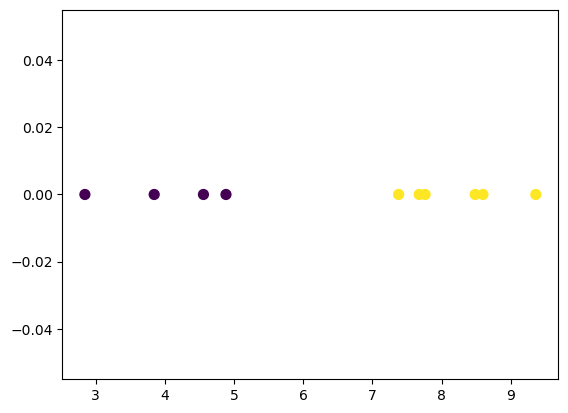

In [610]:
import numpy as np
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def gmm_init(k, dataset):
    kmeans = KMeans(k, init='k-means++').fit(X=array(dataset).reshape(-1, 1))
    gmm_params = []
    cluster = []
    prob_c = []
    mean = []
    var = []

    # generate k clusters
    for i in range(k):
        cluster.append([x[0] for x in filter(lambda x: x[1] == i, zip(data, kmeans.labels_))])
        prob_c.append(len(cluster[i]) / len(data))
        mean.append(sum(cluster[i])/len(cluster[i]))
        var.append(sum(map(lambda x : (x - mean[i]) ** 2, cluster[i])) / len(cluster[i]))
        gmm_params.append(Component(prob_c[i], mean[i], var[i]))
    
    return gmm_params

def compute_gmm(k, dataset, probs):
    '''
        Compute P(C_j), mean_j, var_j
    '''
    # Compute P(C_j), mean_j, var_j
    
    gmm_params = []
    prob_c = []
    mean = []
    var = []
    probs_array = array(probs)
    # sum each column in probs
    probs_sum = probs_array.sum(axis=0)

    for j in range(k):
        prob_c.append(probs_sum[j] / len(dataset))
        mean.append(sum([x[0] * x[1] for x in zip(probs_array[:, j], dataset)]) / probs_sum[j])
        var.append(sum([probs_array[x, j] * (dataset[x] - mean[j]) ** 2 for x in range(len(dataset))]) / probs_sum[j])
        gmm_params.append(Component(prob_c[j], mean[j], var[j]))
    
    return gmm_params
  

def compute_probs(k, dataset, gmm_params):
    '''
        For all x_i in dataset, compute P(C_j | X_i)
        = P(X_i | C_j)P(C_j) / P(X_i) for all C_j
        return the list of lists of all P(C_j | X_i)
        for all x_i in dataset.
    '''
    probs = [] # P(C_k | X_i)
    prob_x = [] # P(X_i)
 
    for p in range(len(dataset)):
        pdf_i = []
        prob_x_i = 0
        prob_c = []
    
        for j in range(k):
            # P(X_i | C_j)
            pdf_i.append(norm.pdf(dataset[p], gmm_params[j].mean, gmm_params[j].variance))
            # P(C_j) already computed
            # gmm_params[j].mixture_prop
            # P(X_i) = P(C_0)P(X_i | C_0) + P(C_1)P(X_i | C_1)
            prob_x_i += np.float64(gmm_params[j].mixture_prop) * pdf_i[j]
        prob_x.append(prob_x_i)

        # P(C_j | X_i) = P(X_i | C_j)P(C_j) / P(X_i)
        for j in range(k):
            prob_c.append(np.float64(gmm_params[j].mixture_prop) * pdf_i[j] / prob_x[p])
        probs.append(prob_c)
        
    return probs


def expectation_maximization(k, dataset, iterations):
    '''
        Repeat for a set number of iterations.
    '''
    gmm_params = gmm_init(k, dataset)
    for _ in range(iterations):
        # expectation step
        probs = compute_probs(k, dataset, gmm_params)

        # maximization step
        gmm_params = compute_gmm(k, dataset, probs)

    return probs, gmm_params

        

# for testing: you should see smaller sized points
# near the boundary of a cluster if it is close to another cluster
probs, gmm_p = expectation_maximization(2, data, 3)
labels = [argmax(array(p)) for p in probs] # create a hard assignment
size = 50 * array(probs).max(1) ** 2  # square to emphasize the difference
plt.scatter(data, [0.0 for _ in range(len(data))], c=labels, cmap='viridis', s=size)
plt.show()


Notes:

1. your code should work with any number of components, each with reasonable parameters.
2. your code should work for 1 to about 5 iterations of the EM algorithm. It may not work for iterations over 10 because the math we are doing may overflow and create `nans` - that's ok / don't worry about it.
3. worksheet 7 is your friend

## Exercise 2 (50 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (2.5 points)

In [428]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
import pandas as pd

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# your code here
df = pd.DataFrame(X)
df["target"] = y
print(df)
df.to_csv('file1.csv')

         0    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
69995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       778  779  780  781  782  783  target  
0    

b) Plot the singular value plot for a single example of the 0 digit (2.5 points)

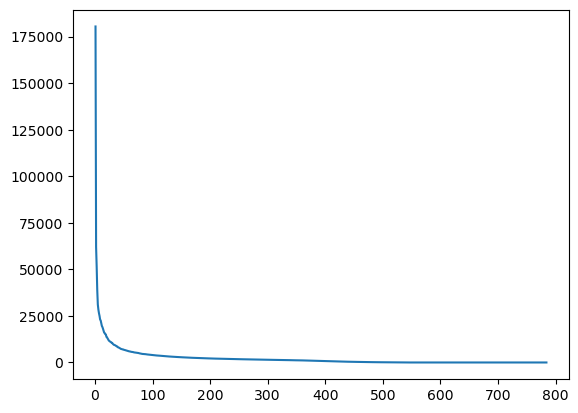

In [436]:
import pandas as pd

data_set = pd.read_csv("file1.csv")
# slice the first column
data_set = data_set.iloc[:,1:]
# print(data_set)
# filter the 0s
digits_with0 = data_set.loc[data_set["target"] == 0]
# slice the last column
digits_with0 = digits_with0.iloc[:,:-1]
u, s, vh = np.linalg.svd(digits_with0,full_matrices=False)
plt.plot(range(1, len(s)+1), s)
plt.show()

In [ ]:
# u and the Hermitian transpose of vh are 2D arrays with orthonormal columns
# s is a 1D array of digits_with0's singular values. 
# print(s)

c) Just like we did in class with the image of the boat: By setting some singular values to 0, plot the approximation of an image of a 0 digit next to the original image. (10 points)

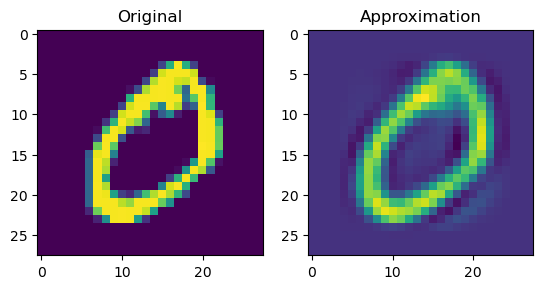

In [438]:
scopy = s.copy()
scopy[40:] = 0.0

# original dataset with singular values
d0_original1 = np.dot(u, np.diag(s))
d0_original2 = np.dot(d0_original1, vh)
# reduced singular values
d0_ap1 = np.dot(u, np.diag(scopy))
d0_ap2 = np.dot(d0_ap1, vh)

plt.subplot(1,2,1)
image_original = np.array(d0_original2[0], dtype='float')
# sqrt(728) = 28
dataset_original = image_original.reshape((28,28))
plt.imshow(dataset_ori)
plt.title("Original")
plt.subplot(1,2,2)
image_ap = np.array(d0_ap2[0], dtype='float')
dataset_ap = image_ap.reshape((28,28))
plt.title("Approximation")
plt.imshow(dataset_ap)



d) Consider the entire dataset as a matrix. Perform SVD and explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions. (5 points)

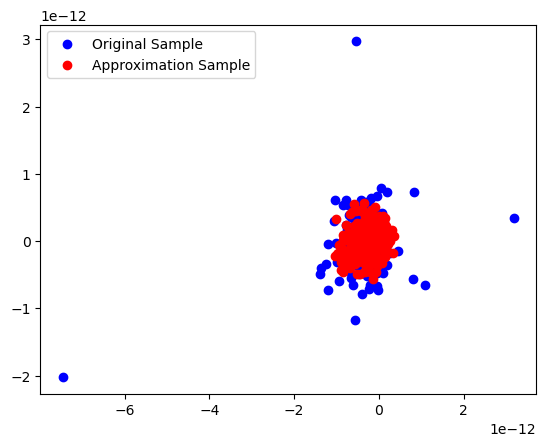

In [616]:
sample = data_set[0:400].iloc[:,:-1]
u, s, vh = np.linalg.svd(sample, full_matrices=False)
scopy = s.copy()
scopy[40:] = 0.0

d0_original1 = np.dot(u, np.diag(s))
d0_original2 = np.dot(d0_original1, vh)
d0_ap1 = np.dot(u, np.diag(scopy))
d0_ap2 = np.dot(d0_ap1, vh)
# print(d0_ap2)

original = plt.scatter(d0_original2[:,0], d0_original2[:,1], color="blue")
ap = plt.scatter(d0_ap2[:,0], d0_ap2[:,1], color="red")
plt.legend((original, ap), ("Original Sample", "Approximation Sample"))
plt.show()


Explain why / how you chose a particular rank: The rank is chosen as 40 which means the first 40 singular values are kept and the remaining are set to 0. To find the right rank, we need to find the elbow point, and the elbow point is at around 40 in the graph of question 2b. We don't want to choose a very high or low rank because a high rank can lead to intensive computing and potential overfitting, and a low rank can cause a loss of significant information. 

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images. (10 points)

/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


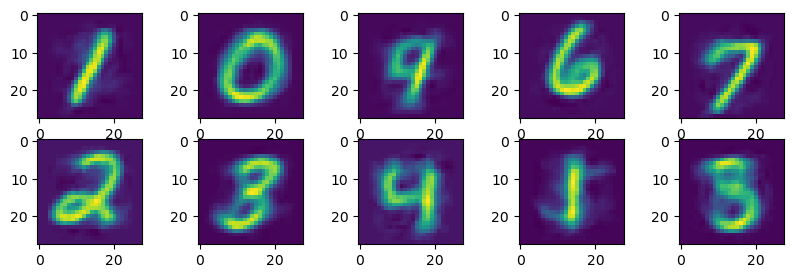

In [617]:
k_means = KMeans(n_clusters=10)
# 2e perfom kmeans on your reconstructed dataset
k_means.fit(d0_ap2)
clusters_e = k_means.predict(sample)
centroids = np.array(k_means.cluster_centers_, dtype='float')
a = []
for i in range(len(centroids)):
    a.append(centroids[i].reshape(28, 28))

fig, axs = plt.subplots(2, 5, figsize=(10, 3))
k = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(a[k])
        k += 1

f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe between the centroids. (5 points)

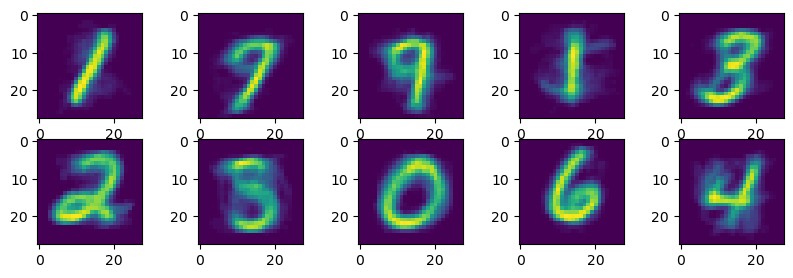

In [618]:
k_means = KMeans(n_clusters=10)
k_means.fit(sample)
clusters_f = k_means.predict(sample)
centroids = np.array(k_means.cluster_centers_, dtype='float')
b = []
for i in range(len(centroids)):
    b.append(centroids[i].reshape(28, 28))

fig, axs = plt.subplots(2, 5, figsize=(10, 3))
k = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(b[k])
        k += 1

In 2e, we perform kmeans on the SVD reconstructed dataset. We may lose some information and the result accuracy can be affected. But at the same time, the more generalized information of the dimensionality-reduced dataset can give us better results. The numbers generated by 2e are less blurry than the 2f. We used the original dataset to perform kmeans and that took advantage of the full feature space information. The numbers are slightly more blurry, maybe because using all data can cause overfitting and include noises. 

g) Create a matrix (let's call it `O`) that is the difference between the original dataset and the rank-10 approximation of the dataset. (5 points)

In [638]:
scopy = s.copy()
scopy[10:] = 0.0

ori_mat1 = np.dot(u, np.diag(s))
ori_mat2 = np.dot(ori_mat1, vh)
r10_ap1 = np.dot(u, np.diag(scopy))
r10_ap2 = np.dot(r10_ap1, vh)
O = ori_mat2 - r10_ap2
print(O)

[[ 5.41224977e-13 -2.41282898e-14 -1.42065888e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.95087058e-12 -1.74825049e-12 -1.96555919e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.25231333e-12 -5.03164954e-13  1.04192661e-12 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-4.57316917e-14 -4.80197848e-14  4.85381419e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.24401987e-13  1.53610137e-13  9.63685053e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.15740361e-14  8.35792026e-14 -1.64980688e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


h) The largest (using euclidean distance from the origin) rows of the matrix `O` could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows of that matrix `O`. (10 points)

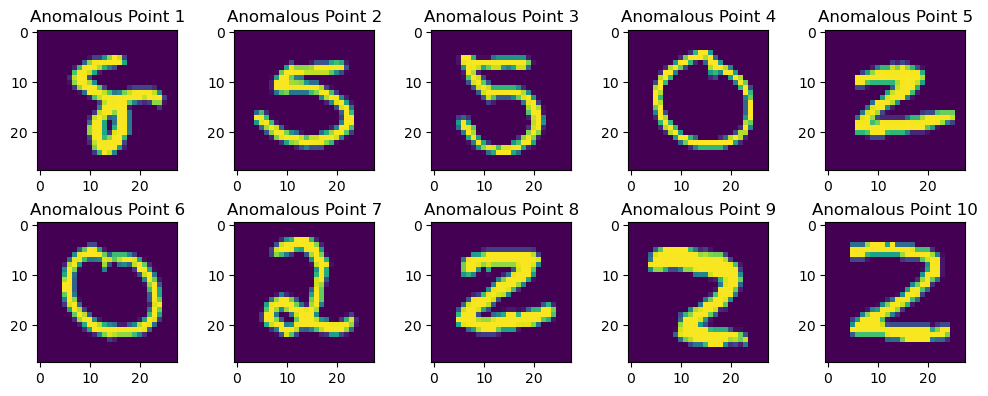

In [639]:
largest_rows = np.argsort(np.linalg.norm(O, axis=1))[-10:]
images = data_set.iloc[:, :-1].values[largest_rows]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title(f"Anomalous Point {i+1}")
plt.tight_layout()
plt.show()

The largest rows are the data points with the furthest distance from the origin and can be outliers. 

## Exercise 3 (25pts)

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 2 Points**

In [653]:
from sklearn.model_selection import train_test_split
import pandas as pd

sample_indices = np.random.choice(X.shape[0], 5000, replace=False)
X_sample = X[sample_indices]
y_sample = y[sample_indices]
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1)


b) For K ranging from 1 to 20:

1. train a KNN on the training data - **2 points**
2. record the training and testing accuracy - **2 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 4 points**

/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

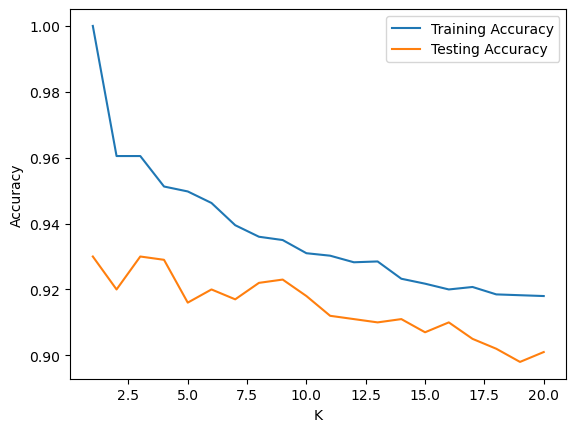

In [654]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# create empty lists to store accuracy scores
train_scores = []
test_scores = []

# define range of K values to test
k_values = range(1, 21)

# train and test KNN for each K value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    train_scores.append(train_acc)
    test_scores.append(test_acc)

# plot training and testing accuracy vs K values
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

K is optimal at around 3 when the testing accuracy curve hits the highest point. After that, the testing accuracy continues to decrease. 

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors (5pts)

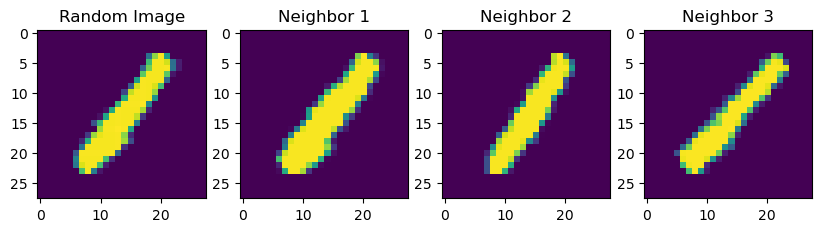

In [666]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
# randomly index chosen from X_test
random_index = np.random.randint(len(X_test))
# use the index to select a image and reshape to 28*28
random_image = X_test[random_index]
distances, indices = knn.kneighbors([random_image])

fig, ax = plt.subplots(1, 4, figsize=(10, 3))

ax[0].imshow(random_image.reshape(28, 28))
ax[0].set_title('Random Image')

for i in range(1, 4):
    neighbor_idx = indices[0][i-1]
    neighbor_image = X_train[neighbor_idx].reshape(28, 28)
    ax[i].imshow(neighbor_image)
    ax[i].set_title('Neighbor {}'.format(i))
plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed. (10 points)

/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/lixi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

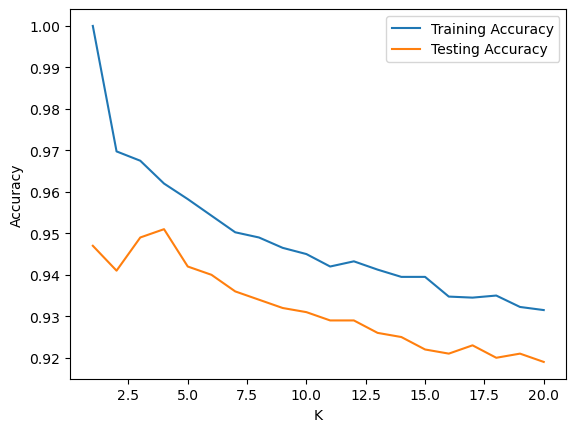

In [667]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# create empty lists to store accuracy scores
train_scores = []
test_scores = []

# define range of K values to test
k_values = range(1, 21)

# train and test KNN for each K value
for k in k_values:
    # choose component 40, which is the same as the previous rank
    pca = PCA(n_components=40)
    knn = KNeighborsClassifier(n_neighbors=k)
    model = make_pipeline(pca, knn)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_scores.append(train_acc)
    test_scores.append(test_acc)

# plot training and testing accuracy vs K values
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed: 
The new model chains both PCA and KNN which reduces the dimensionality of the dataset. By reducing the dimensionality, we lost some information from the dataset but it could prevent overfitting. The testing accuracy starts from 0.95 which is a higher starting point than before. The graph clearly shows that the optimal K will be at around 3-4. Both curves are more smooth and showing a clearer trend than before. This is because we applied PCA into our model and generalized our dataset and avoided overfitting. 

## Bonus (20 points)

Complete the code below to support N-dimensional GMM clustering. Only use the methods imported below. Please take a look at the comments and docstrings for more info.

In [ ]:
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal, uniform

nd_gmm = [
    Component(.25, [-1, 1], [[1, 0], [0, 1]]),
    Component(.50, [0, 0], [[1, 0], [0, 1]]),
    Component(.25, [1, 1], [[1, 0], [0, 1]])
]

def generate_nd_gmm_dataset(gmm_params, size):
    if not is_valid_nd_gmm(gmm_params):
        raise ValueError("GMM parameters are invalid")
    
    dataset = []
    for _ in range(size):
        comp = get_random_component(gmm_params)
        dataset += ...
    return dataset # this should be a numpy array instead of a list


def is_valid_nd_gmm(gmm_params):
    '''
        Check that all the dimensions are consistent
        accross all components
    '''
    ...
    return is_valid_gmm(gmm_params) # checks if mixture components add to 1


def gmm_nd_init(k, dataset):
    kmeans = KMeans(k, init='k-means++').fit(X=...)
    gmm_params = []
    ...
    return gmm_params


def compute_nd_gmm(k, dataset, probs):
    '''
        Compute P(C_j), mean_j, var_j

        Here mean_j is a vector and var_j is a matrix
    '''
    gmm_params = []
    ...
    return gmm_params


def compute_nd_probs(k, dataset, gmm_params):
    '''
        For all x_i in dataset, compute P(C_j | X_i)
        = P(X_i | C_j)P(C_j) / P(X_i) for all C_j
        return the list of lists of all P(C_j | X_i)
        for all x_i in dataset.
        
        Here x_i are vectors
    '''
    probs = []
    ...
    return probs


def expectation_maximization_nd(k, dataset, iterations):
    '''
        Repeat for a set number of iterations.
    '''
    gmm_params = gmm_nd_init(k, dataset)
    for _ in range(iterations):
        # expectation step
        probs = compute_nd_probs(k, dataset, gmm_params)

        # maximization step
        gmm_params = compute_nd_gmm(k, dataset, probs)

    return probs, gmm_params


data = generate_nd_gmm_dataset(nd_gmm, 100)
probs, gmm_p = expectation_maximization_nd(2, data, 3)
labels = [argmax(array(p)) for p in probs] # create a hard assignment
size = 50 * array(probs).max(1) ** 2
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=size)
plt.show()